RESTAURANT FOOD COST PREDICTION

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading train and test data
data=pd.read_csv('https://raw.githubusercontent.com/Mishra35nivedita/Internship/main/Data_Train.csv')

In [3]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
t_data=pd.read_csv('https://raw.githubusercontent.com/Mishra35nivedita/Internship/main/Data_Test.csv')

In [5]:
t_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
data.sample(20)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
5563,QUICK BITES,10321,"Healthy Food, Salad",11am – 11pm (Mon-Sun),Bangalore,Bellandur,3.7,21 votes,600
4502,LOUNGE,15374,"Mediterranean, Continental, Italian, Juices, M...",12noon – 12:30AM (Mon-Sun),New Delhi,Adchini,3.9,770 votes,1800
5569,CASUAL DINING,13285,"Arabian, North Indian",12noon – 9pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.8,99 votes,400
6735,CASUAL DINING,1613,"North Indian, Mughlai, Chinese","11:30am – 3:30pm, 6:30pm – 11pm (Mon-Sun)",Bangalore,Hennur,4.0,260 votes,600
4689,QUICK BITES,7794,"Chinese, Kebab",7am – 12midnight (Mon-Sun),Andheri West,Oshiwara,3.6,78 votes,300
5937,QUICK BITES,15032,"South Indian, North Indian, Chinese, Fast Food",7am – 11pm (Mon-Sun),Mumbai,Mulund East,3.9,235 votes,300
11057,QUICK BITES,8261,Street Food,12:30pm – 10pm (Mon-Sun),Hyderabad,Sanath Nagar,3.8,42 votes,150
7288,CASUAL DINING,12710,"North Indian, South Indian, Chinese",10am – 10pm (Mon-Sun),Chennai,Saligramam,3.3,91 votes,250
3889,QUICK BITES,8929,Fast Food,4:30pm – 3am (Mon-Sun),Mumbai,Borivali West,4.0,398 votes,600
7857,CASUAL DINING,15358,Arabian,4pm – 1am (Mon-Sun),Kakkanad,Edappally,3.3,24 votes,500


In [154]:
#Checkinng shape of train and test set
data.shape


(12690, 9)

In [155]:
t_data.shape

(4231, 8)

In [157]:
#let's check data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [156]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


We can see that alomost all columns have object type data except Cost(label) and restaurant_id

In [158]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

City, locality, rating and votes have a lot of null values


In [159]:
t_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [160]:
#Let's check unique values-
for i in data.columns:
    print("Unique values in", i, data[i].nunique())

Unique values in TITLE 113
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


In [161]:
for i in t_data.columns:
    print("Unique values in", i, t_data[i].nunique())

Unique values in TITLE 86
Unique values in RESTAURANT_ID 4127
Unique values in CUISINES 1727
Unique values in TIME 1183
Unique values in CITY 151
Unique values in LOCALITY 834
Unique values in RATING 31
Unique values in VOTES 1136


DATA PREPROCESSING

In [3]:
data['VOTES'] = data['VOTES'].str.replace(' votes', '').astype(float)

In [6]:
t_data['VOTES'] = t_data['VOTES'].str.replace(' votes','').astype(float)

In [7]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [8]:
data['COST'] = data['COST'].astype(float)


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12578 non-null  object 
 5   LOCALITY       12592 non-null  object 
 6   RATING         12688 non-null  object 
 7   VOTES          11486 non-null  float64
 8   COST           12690 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 892.4+ KB


In [10]:
t_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          4231 non-null   object 
 1   RESTAURANT_ID  4231 non-null   int64  
 2   CUISINES       4231 non-null   object 
 3   TIME           4231 non-null   object 
 4   CITY           4196 non-null   object 
 5   LOCALITY       4201 non-null   object 
 6   RATING         4229 non-null   object 
 7   VOTES          3829 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 264.6+ KB


In [11]:
#Removing unwanted column-
data.drop(columns=['RESTAURANT_ID'],axis=1, inplace=True)

In [12]:
t_data.drop(columns=['RESTAURANT_ID'],axis=1, inplace=True)

In [16]:
data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0


In [13]:
#Changing data type and replacing values in Rating column
data['RATING'] = data['RATING'].str.replace('NEW', '1')
data['RATING'] = data['RATING'].str.replace('-', '1').astype(float)

In [14]:
t_data['RATING'] = t_data['RATING'].str.replace('NEW', '1')
t_data['RATING'] = t_data['RATING'].str.replace('-', '1').astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12578 non-null  object 
 4   LOCALITY  12592 non-null  object 
 5   RATING    12688 non-null  float64
 6   VOTES     11486 non-null  float64
 7   COST      12690 non-null  float64
dtypes: float64(3), object(5)
memory usage: 793.2+ KB


In [16]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     4231 non-null   object 
 1   CUISINES  4231 non-null   object 
 2   TIME      4231 non-null   object 
 3   CITY      4196 non-null   object 
 4   LOCALITY  4201 non-null   object 
 5   RATING    4229 non-null   float64
 6   VOTES     3829 non-null   float64
dtypes: float64(2), object(5)
memory usage: 231.5+ KB


In [17]:
#Filling missing values and encoding
from sklearn.preprocessing import LabelEncoder


In [18]:
le=LabelEncoder()


In [19]:
data_1=le.fit_transform(data['TITLE'])
data_2=le.fit_transform(data['CUISINES'])
data_3=le.fit_transform(data['TIME'])
data_4=le.fit_transform(data['CITY'])
data_5=le.fit_transform(data['LOCALITY'])


In [20]:
data['TITLE']=data_1
data['CUISINES']=data_2
data['TIME']=data_3
data['CITY']=data_4
data['LOCALITY']=data_5



In [21]:
data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,3.6,49.0,1200.0
1,33,289,1885,67,1046,4.2,30.0,1500.0
2,31,2976,661,67,1101,3.8,221.0,800.0
3,95,4130,275,222,136,4.1,24.0,800.0
4,50,1766,615,222,620,3.8,165.0,300.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  int32  
 1   CUISINES  12690 non-null  int32  
 2   TIME      12690 non-null  int32  
 3   CITY      12690 non-null  int32  
 4   LOCALITY  12690 non-null  int32  
 5   RATING    12688 non-null  float64
 6   VOTES     11486 non-null  float64
 7   COST      12690 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 545.4 KB


In [23]:
data['CITY']=data['CITY'].fillna(data['CITY'].mean())
data['LOCALITY']=data['LOCALITY'].fillna(data['LOCALITY'].mean())





In [24]:
data['RATING']=data['RATING'].fillna(data['RATING'].mean())
data['VOTES']=data['RATING'].fillna(data['VOTES'].mean())

In [25]:
data.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [26]:
data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,3.6,3.6,1200.0
1,33,289,1885,67,1046,4.2,4.2,1500.0
2,31,2976,661,67,1101,3.8,3.8,800.0
3,95,4130,275,222,136,4.1,4.1,800.0
4,50,1766,615,222,620,3.8,3.8,300.0


In [27]:
t_data_1=le.fit_transform(t_data['TITLE'])
t_data_2=le.fit_transform(t_data['CUISINES'])
t_data_3=le.fit_transform(t_data['TIME'])
t_data_4=le.fit_transform(t_data['CITY'])
t_data_5=le.fit_transform(t_data['LOCALITY'])


In [28]:
t_data['TITLE']=t_data_1
t_data['CUISINES']=t_data_2
t_data['TIME']=t_data_3
t_data['CITY']=t_data_4
t_data['LOCALITY']=t_data_5

In [29]:
t_data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,662,4.3,564.0
1,75,1632,933,96,221,4.2,61.0
2,23,1455,219,96,411,3.8,350.0
3,66,208,1071,41,456,3.8,1445.0
4,75,1637,208,78,300,3.6,23.0


In [30]:
t_data['CITY']=t_data['CITY'].fillna(t_data['CITY'].mean())
t_data['LOCALITY']=t_data['LOCALITY'].fillna(t_data['LOCALITY'].mean())


In [31]:
t_data['RATING']=t_data['RATING'].fillna(t_data['RATING'].mean())
t_data['VOTES']=t_data['VOTES'].fillna(t_data['VOTES'].mean())

In [32]:
t_data.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

Now the data seems fine for both train and test sets.
All object data are in integer data type, there are no null values and data type is int and float for the features.

In [33]:
data.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,144.858550,660.685658,3.521572,3.521572,655.252246
std,32.762427,1204.091664,754.459944,86.027304,403.713270,0.909173,0.909173,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,3.400000,3.400000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,590.000000,3.800000,3.800000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1011.000000,4.000000,4.000000,800.000000
max,112.000000,4154.000000,2688.000000,359.000000,1416.000000,4.900000,4.900000,14000.000000


Observation-

The range standard deviation of the features is from 0.9 to 1204.
The remaining data seems fine.

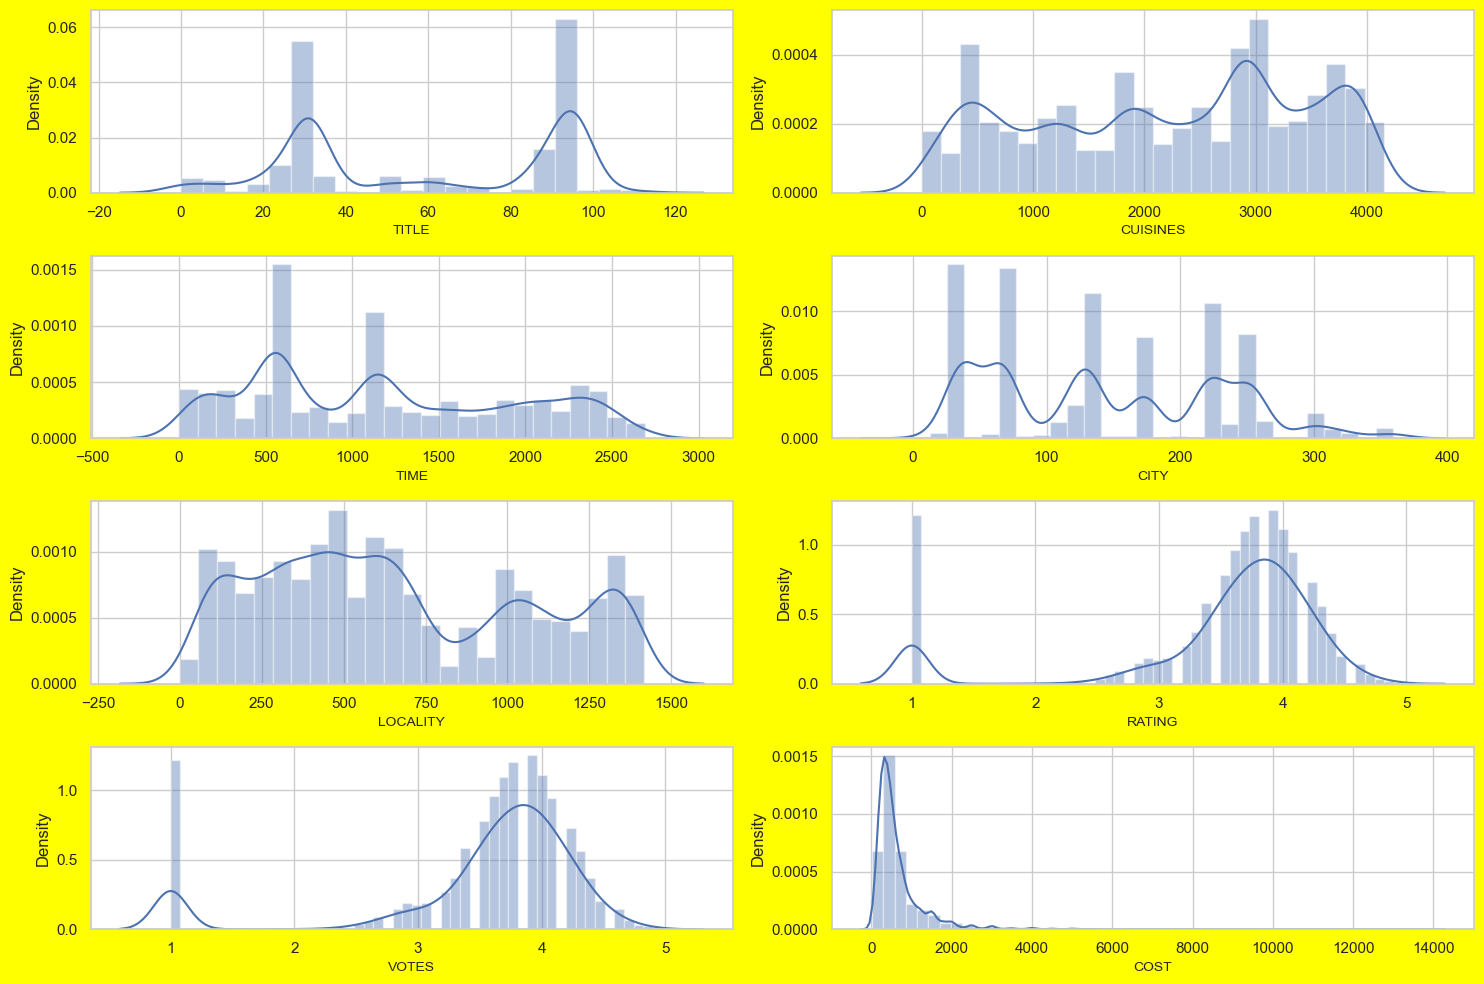

In [51]:
#Let's vizualize the distribution of data for each feature
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Since there are many unique values for each features, the distribution is not perfectly normal but it seems okay. 
Only Cost(label) column seems to have skewness which we do not need to work on as it is label.

In [53]:
#Checking skewness
data.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.304387
LOCALITY    0.334548
RATING     -1.875525
VOTES      -1.875525
COST        3.978801
dtype: float64

Text(0.5, 1.0, 'Distribution of Cost')

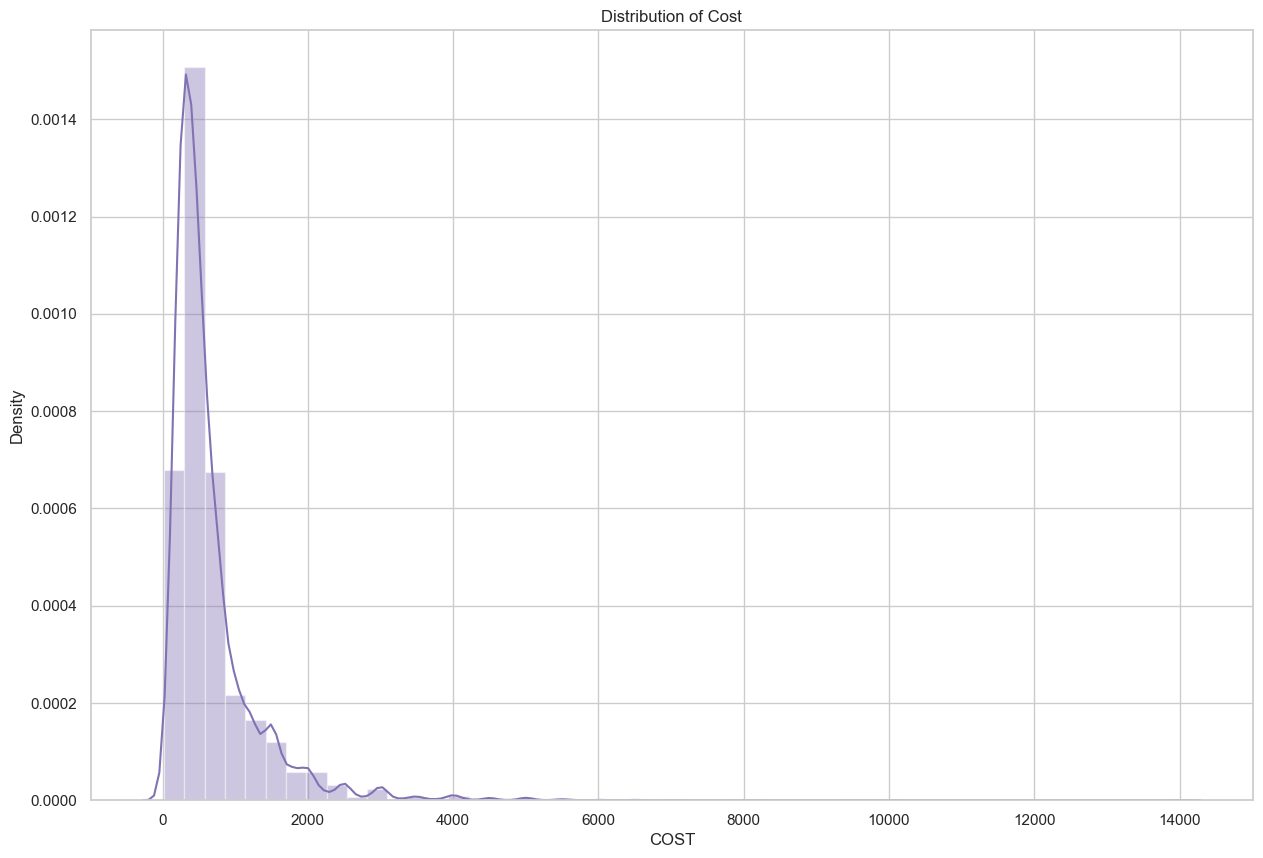

In [37]:
# Exploratory data analysis
sns.set(style='whitegrid')
ax = plt.subplots(1,1, figsize=(15, 10))
ax = sns.distplot(data['COST'], kde = True, color = 'm')
plt.title('Distribution of Cost')

The graph shows that cost of food ranges from Rs.0 to approx Rs.5,900.

Text(0.5, 1.0, 'Rating')

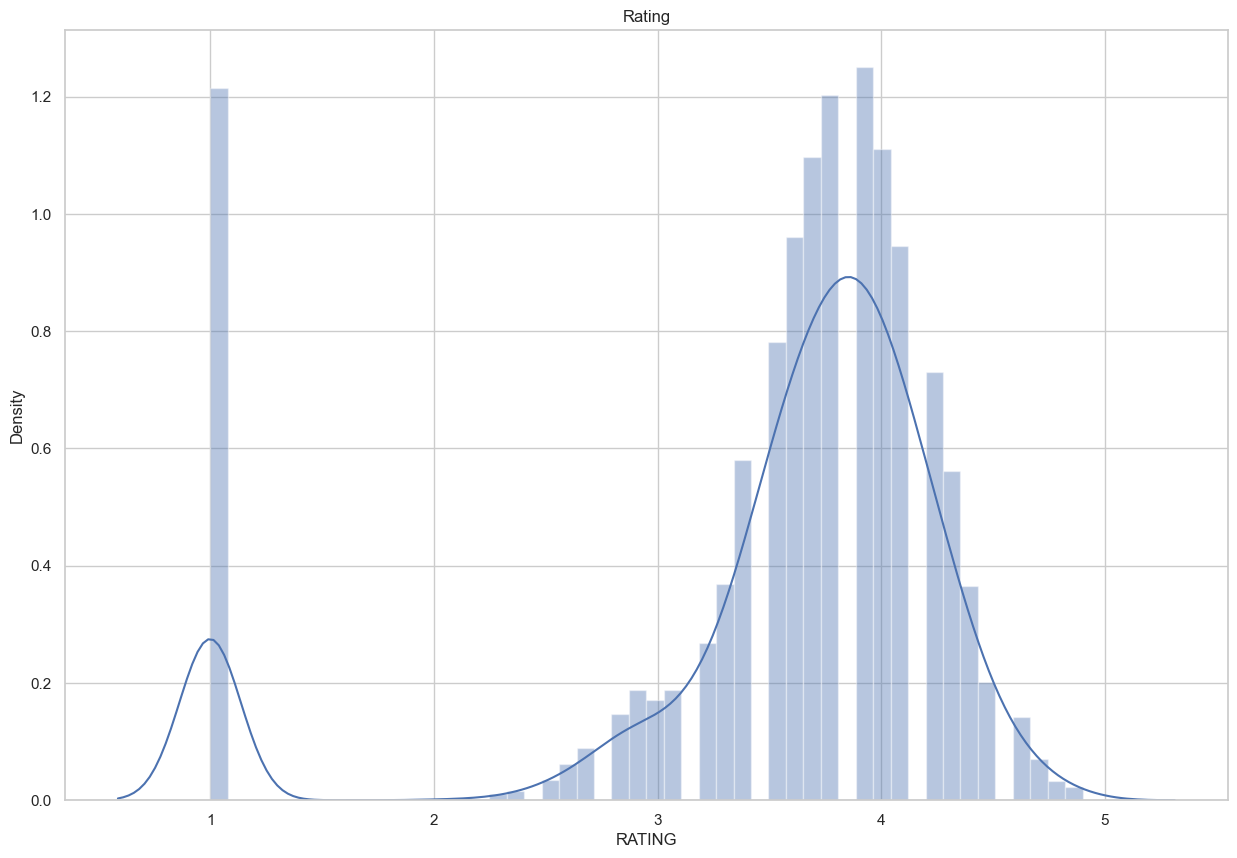

In [34]:
# Exploratory data analysis
sns.set(style='whitegrid')
ax = plt.subplots(1,1, figsize=(15, 10))
ax = sns.distplot(data['RATING'], kde = True, color = 'b')
plt.title('Rating')

The graph shows that most customers have rated the restaurants 3 to 4.5.

<Figure size 1500x3000 with 0 Axes>

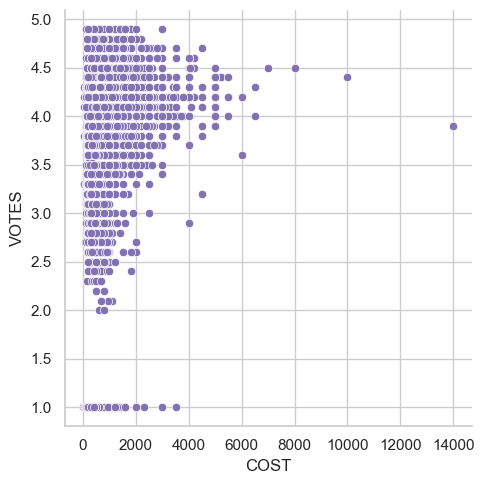

In [46]:
#Relationship between cost and votes.
ax = plt.figure(figsize=(15, 30))
ax = sns.relplot(x='COST', y='VOTES', data=data, color='m')
plt.show()

It is evident that highest votes have been recorded for the food cost ranging between min value to Rs.2000.
With the rise of cost, we see fall in the number votes.

<Figure size 1500x3000 with 0 Axes>

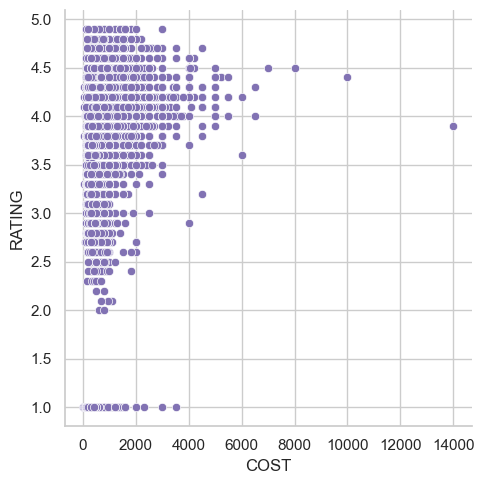

In [35]:
#Relationship between cost and rating.
ax = plt.figure(figsize=(15, 30))
ax = sns.relplot(x='COST', y='RATING', data=data, color='m')
plt.show()

We see the same relationship between rating and cost as votes and cost. 
At Rs.200, highest rating was given. As cost rises from Rs.2000, rating falls.

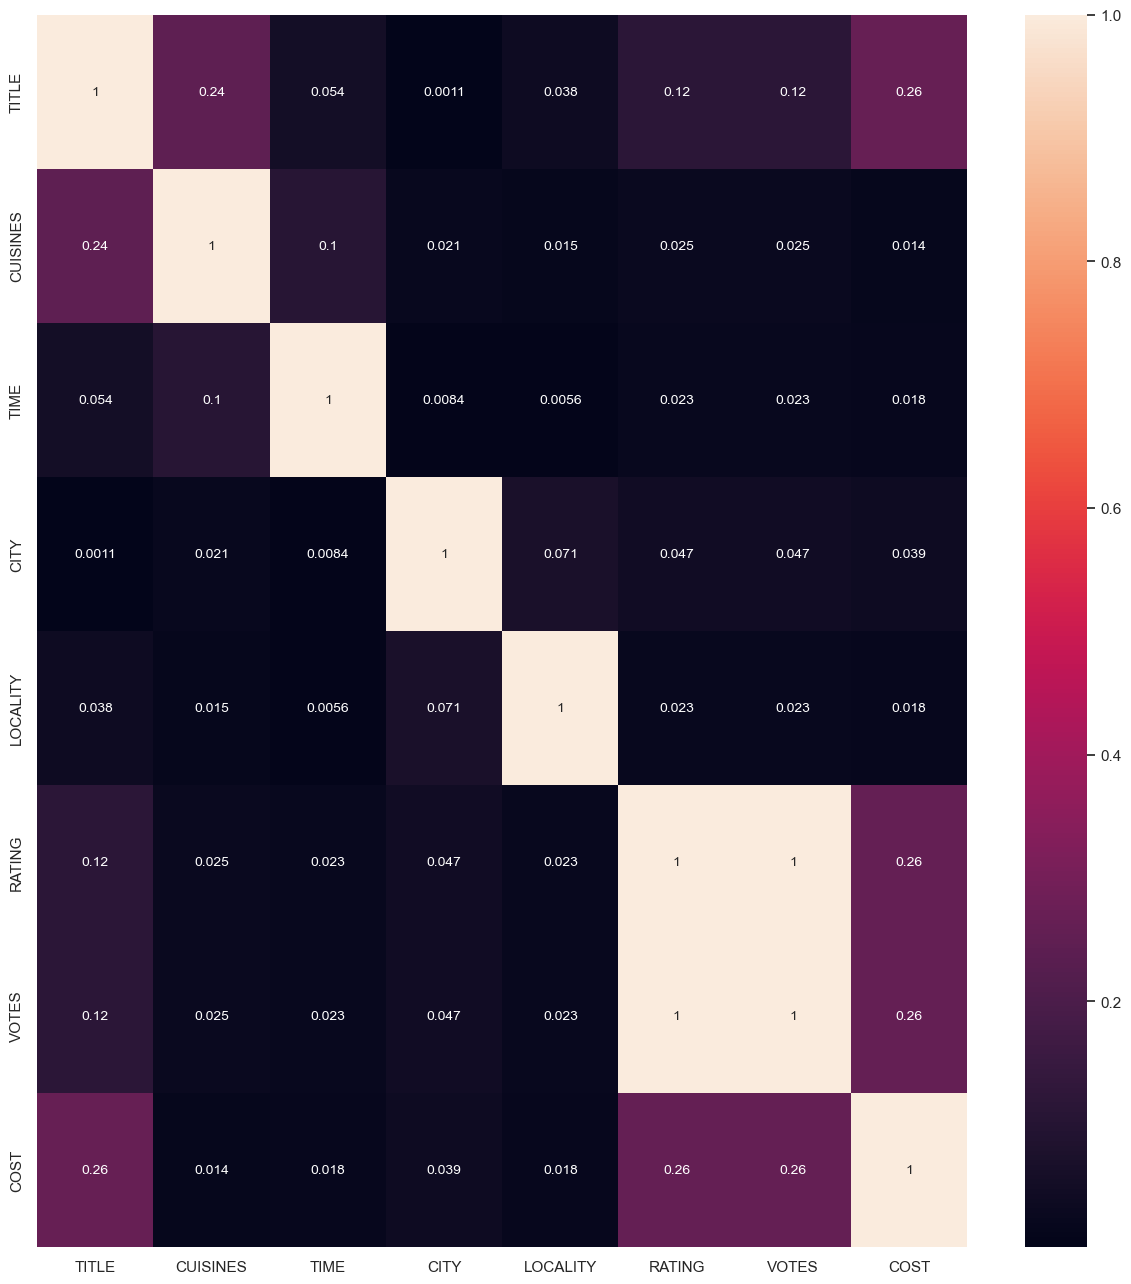

In [36]:
#Plotting heatmap to check for corelation between features-
df_corr= data.corr().abs()
plt.figure(figsize=(15,16))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

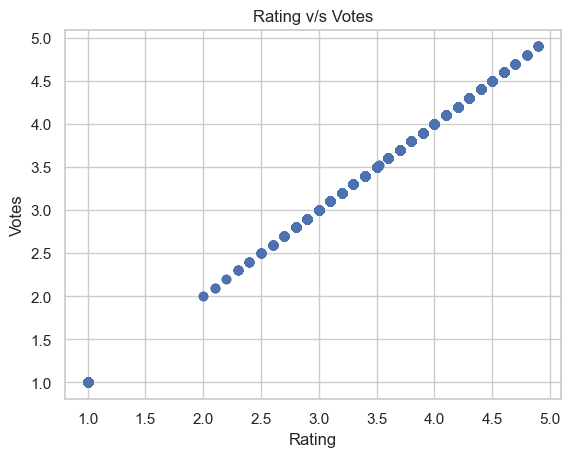

In [37]:
#We can see that votes and rating are highly correlated and seem to have multicollinearity issue. Let's confirmn it.
plt.scatter(data.RATING,data.VOTES)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating v/s Votes')
plt.show()


<Axes: title={'center': 'Correlation with Cost'}>

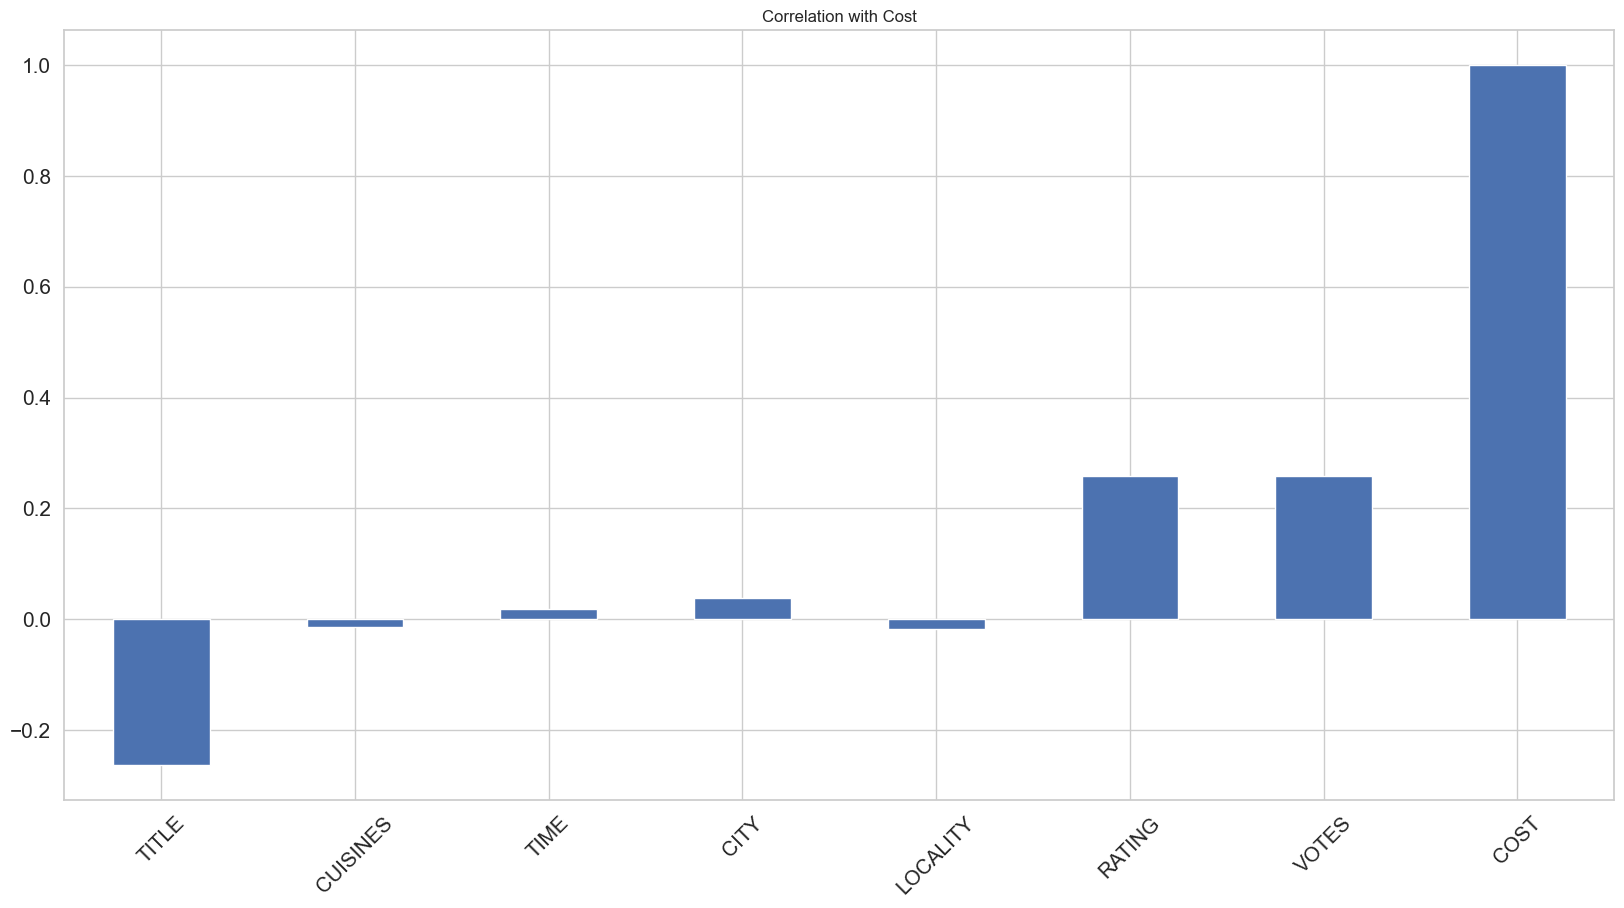

In [38]:
#This confirms that our initial observation was correct. We will need to drop one of these features.
#Correlation with Cost with respect to attributes
data.corrwith(data.COST).plot.bar(
        figsize = (20, 10), title = "Correlation with Cost", fontsize = 15,
        rot = 45, grid = True)

In [42]:
#As Votes and Ratings are highly correlated features, we will need to drop one of them. Let's drop Votes.
data.drop(columns=['VOTES'], axis=1, inplace=True)


In [43]:
t_data.drop(columns=['VOTES'],axis=1, inplace=True)

In [44]:
data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
0,31,2627,739,320,285,3.6,1200.0
1,33,289,1885,67,1046,4.2,1500.0
2,31,2976,661,67,1101,3.8,800.0
3,95,4130,275,222,136,4.1,800.0
4,50,1766,615,222,620,3.8,300.0


In [45]:
t_data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
0,23,1293,503,110,662,4.3
1,75,1632,933,96,221,4.2
2,23,1455,219,96,411,3.8
3,66,208,1071,41,456,3.8
4,75,1637,208,78,300,3.6


In [125]:
#Separating feautueres and label
X = data.drop(['COST'],axis=1)
y = data['COST']

In [110]:
y

0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12685     500.0
12686    1800.0
12687    1300.0
12688     400.0
12689     600.0
Name: COST, Length: 12690, dtype: float64

In [48]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [126]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
X_scaled

array([[-0.86888688,  0.32540837, -0.58465845,  2.03596233, -0.93061212,
         0.08626691],
       [-0.80783894, -1.61638078,  0.93436872, -0.9050803 ,  0.95446336,
         0.74623348],
       [-0.86888688,  0.61526483, -0.68804774, -0.9050803 ,  1.09070403,
         0.30625577],
       ...,
       [ 0.35207201, -0.12224961, -0.057108  ,  1.09436371,  1.68768589,
         0.52624462],
       [-0.86888688,  1.055448  ,  0.87074455, -0.9050803 , -0.07353444,
        -0.02372752],
       [-0.86888688,  0.59034881, -0.4574101 , -0.16110113,  1.66539196,
        -0.13372195]])

In [128]:
#Spliting the Dataset for train and test
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=52)

In [130]:
y_test

11889     300.0
11258     600.0
5976     1250.0
3969      700.0
76        300.0
          ...  
3783      150.0
4725      250.0
6898      250.0
6028      800.0
3500      350.0
Name: COST, Length: 3807, dtype: float64

Model instantiating and training

In [131]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression

In [156]:
reg=LinearRegression()

In [157]:
reg.fit(X_train,y_train)

LinearRegression()

In [117]:
#Checking r2 score and MAE/MSE for train and test
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [158]:
pred_train1=reg.predict(X_train)
pred_test1=reg.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train1)}")
print(f" testing accuracy is {r2_score(y_test,pred_test1)}")

 training accuracy is 0.13856272062091823
 testing accuracy is 0.10497126488439745


In [134]:
mean_score = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 353.38124517854504


In [81]:
#Checking cross validation score to ensure model isn't overfitting-
from sklearn.model_selection import cross_val_score

In [135]:
for k in range(3,6):
    cv_score=cross_val_score(regression,X_scaled,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.12873242911356142


 at 4, cross val score is 0.12826213175224635


 at 5, cross val score is 0.12892462870585103




In [63]:
#Using Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [159]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [160]:
pred_train2=gbr.predict(X_train)
pred_test2=gbr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train2)}")
print(f" testing accuracy is {r2_score(y_test,pred_test2)}")

 training accuracy is 0.7522487299199203
 testing accuracy is 0.6454695127830548


In [139]:
for k in range(3,6):
    cv_score=cross_val_score(gbr,X_scaled,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7042964442347767


 at 4, cross val score is 0.6982519263862176


 at 5, cross val score is 0.7036699997425302




In [140]:
mean_score = metrics.mean_absolute_error(y_test,y_pred1)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 203.39630384164522


In [141]:
#Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [161]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [162]:
pred_train3=dt.predict(X_train)
pred_test3=dt.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train3)}")
print(f" testing accuracy is {r2_score(y_test,pred_test3)}")

 training accuracy is 0.9999875954782177
 testing accuracy is 0.4694189498350062


In [145]:
mean_score = metrics.mean_absolute_error(y_test,y_pred2)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 255.08274231678487


In [146]:
for k in range(3,6):
    cv_score=cross_val_score(dt,X_scaled,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.5416945979204


 at 4, cross val score is 0.4529376726460028


 at 5, cross val score is 0.4524408982648409




In [147]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [163]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [164]:
pred_train4=rfr.predict(X_train)
pred_test4=rfr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train4)}")
print(f" testing accuracy is {r2_score(y_test,pred_test4)}")

 training accuracy is 0.9650253136739958
 testing accuracy is 0.661705163345047


In [151]:
mean_score = metrics.mean_absolute_error(y_test,y_pred3)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 193.0482455251604


In [152]:
for k in range(3,6):
    cv_score=cross_val_score(rfr,X_scaled,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7195208173649194


 at 4, cross val score is 0.7186943372609983


 at 5, cross val score is 0.7241351703037205




We can see that Linear Regression model gives the best test score however it is unrealistic to 104% accuracy. 
Random Forest Regressor seems to be a better performing model however, the difference of train and test score is too high.
Gradient Boosting Regressor seems to be performing best on this data/ It has less difference is train and test score, doesn't seem to be overfitted also low MAE as well.
We are Finalizing Random Forest Regressor as our final model

In [165]:
y_pred = gbr.predict(X_test)

In [167]:
data1= pd.DataFrame({'Actual' : y_test, 'LR predicted': y_pred})


In [169]:
data1.head(10)

,Actual,LR predicted
11889,300.0,371.799816
11258,600.0,929.556597
5976,1250.0,584.613578
3969,700.0,634.927319
76,300.0,259.307517
1077,450.0,626.631504
1902,1000.0,506.814219
6355,500.0,388.355183
7627,400.0,455.224571
1839,150.0,260.728543


In [176]:
#Finding the predicted cost of food on validation data set
new_pred = gbr.predict(t_data)
print("Predicted cost of food : ",new_pred)

Predicted cost of food :  [ 870.56007068 1947.99534947  679.0624363  ... 1030.33637908 1051.6820951
 1043.3417612 ]


In [170]:
#Saving model and loading when required-
import joblib

In [171]:
joblib.dump(gbr,'Food Cost prediction')

['Food Cost prediction']

In [172]:
model = joblib.load('Food Cost prediction')

In [173]:
model

GradientBoostingRegressor()